# Predicting Wine's Quality

## 1. Preparing the data

### 1.2 Importing required libaries

In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing
from sklearn.preprocessing import StandardScaler

# Feature Selection
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

### 1.3 Loading the data

In [3]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### 1.4 Cleaing the data

In [5]:
df.isna().sum().sort_values(ascending=False)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [7]:
df.drop('Id', axis=1, inplace=True)

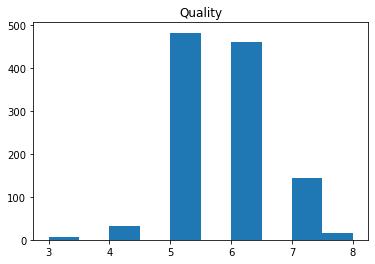

In [8]:
plt.hist(df['quality'])
plt.title('Quality')
plt.show()

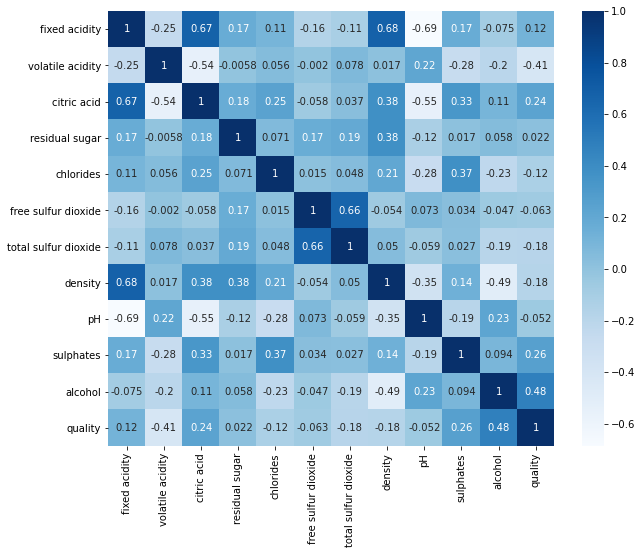

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [10]:
X = df.drop('quality', axis=1)
y = df['quality']

### 1.5 Scaling the data

In [11]:
X_cols = X.columns

sc = StandardScaler()

sc.fit(X)
array_scaled = sc.transform(X)

X = pd.DataFrame(X, columns=X_cols)

### 1.6 Feature Selection

In [12]:
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=7, step=1)
rfe.fit(X, y)
rfe.ranking_

array([2, 1, 1, 3, 1, 5, 4, 1, 1, 1, 1])

In [13]:
features_to_keep = rfe.get_support(1)
features_to_keep

array([ 1,  2,  4,  7,  8,  9, 10], dtype=int64)

In [14]:
X = X[X.columns[features_to_keep]]
X.head()

,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol
0,0.70,0.00,0.076,0.9978,3.51,0.56,9.4
1,0.88,0.00,0.098,0.9968,3.20,0.68,9.8
2,0.76,0.04,0.092,0.9970,3.26,0.65,9.8
3,0.28,0.56,0.075,0.9980,3.16,0.58,9.8
4,0.70,0.00,0.076,0.9978,3.51,0.56,9.4


### 1.7 Splitting the data

In [15]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=44)

## 2. The Models

### 2.1 Linear Regression

#### 2.1.1 Training the model

In [16]:
lr = LinearRegression()
regressor_lr = lr.fit(X_test, y_test)
y_pred_lr = regressor_lr.predict(X_test)

#### 2.1.2 Evaluating the model

##### 2.1.2.1 Calculating Errors

In [17]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f'Mean Absolute Error: {mae_lr}')
print(f'Mean Squared Error: {mse_lr}')
print(f'Root Mean Squared Error: {rmse_lr}')

Mean Absolute Error: 0.4981516223577214
Mean Squared Error: 0.408011555885325
Root Mean Squared Error: 0.6387578225629217


##### 2.1.2.2 Comparing predicted to actual value

In [18]:
entry_X_100 = X.values[100].reshape(1,-1)
entry_y_100 = y.loc[100]
print(X.loc[100], entry_y_100)

volatile acidity     0.6800
citric acid          0.0200
chlorides            0.0870
density              0.9944
pH                   3.5400
sulphates            0.5200
alcohol             10.0000
Name: 100, dtype: float64 5


In [19]:
y_pred_lr_100 = regressor_lr.predict(entry_X_100)

print(f'Predicted Quality: {y_pred_lr_100[0]}')
print(f'Actual Value: {entry_y_100}')

Predicted Quality: 5.090388205894592
Actual Value: 5


### 2.2 KNN Regression

#### 2.2.1 Finding best n-neighbors

In [20]:
MAE_lst = []
MSE_lst = []
RMSE_lst = []
neighbors = range(1,11)

for i in neighbors:
    knn = KNeighborsRegressor(n_neighbors=i)
    regressor_loop = knn.fit(X_train, y_train)
    y_pred = regressor_loop.predict(X_test)
    
    MAE_lst.append(mean_absolute_error(y_test, y_pred))
    MSE_lst.append(mean_squared_error(y_test, y_pred))
    RMSE_lst.append(np.sqrt(mean_squared_error(y_test, y_pred)))

d = {'Neighbors': neighbors, 'MAE': MAE_lst, 'MSE': MSE_lst, 'RMSE': RMSE_lst}

errors = pd.DataFrame(data=d)

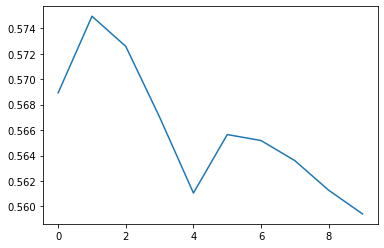

In [21]:
plt.plot(errors['MAE'])
plt.show()

#### 2.2.2 Training the model

In [22]:
knn = KNeighborsRegressor(n_neighbors=4)
regressor_knn = knn.fit(X_train, y_train)
y_pred_knn = regressor_knn.predict(X_test)

#### 2.2.3 Evaluating the model

In [23]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f'Mean Absolute Error: {mae_knn}')
print(f'Mean Squared Error: {mse_knn}')
print(f'Root Mean Squared Error: {rmse_knn}')

Mean Absolute Error: 0.5670131291028446
Mean Squared Error: 0.5229075492341356
Root Mean Squared Error: 0.7231234674895676


##### 2.2.3.1 Comparing predicted to actual value

In [24]:
entry_X_100 = X.values[100].reshape(1,-1)
entry_y_100 = y.loc[100]
print(X.loc[100], entry_y_100)

volatile acidity     0.6800
citric acid          0.0200
chlorides            0.0870
density              0.9944
pH                   3.5400
sulphates            0.5200
alcohol             10.0000
Name: 100, dtype: float64 5


In [25]:
y_pred_knn_100 = regressor_knn.predict(entry_X_100)

print(f'Predicted Quality: {y_pred_knn_100[0]}')
print(f'Actual Value: {entry_y_100}')

Predicted Quality: 5.75
Actual Value: 5


### 2.3 Random Forest Regression

#### 2.3.1 Training the model

In [26]:
rf = RandomForestRegressor(n_estimators=1_000, random_state=44)
regressor_rf = rf.fit(X_train, y_train)
y_pred_rf = regressor_rf.predict(X_test)

#### 2.3.2 Evaluating the model

In [27]:
mae_rf = mean_absolute_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_lr)
rmse_rf = np.sqrt(mse_rf)

print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'Root Mean Squared Error: {rmse_rf}')

Mean Absolute Error: 0.4981516223577214
Mean Squared Error: 0.408011555885325
Root Mean Squared Error: 0.6387578225629217


##### 2.3.2.1 Comparing predicted to actual value

In [28]:
entry_X_100 = X.values[100].reshape(1,-1)
entry_y_100 = y.loc[100]
print(X.loc[100], entry_y_100)

volatile acidity     0.6800
citric acid          0.0200
chlorides            0.0870
density              0.9944
pH                   3.5400
sulphates            0.5200
alcohol             10.0000
Name: 100, dtype: float64 5


In [29]:
y_pred_rf_100 = regressor_rf.predict(entry_X_100)

print(f'Predicted Quality: {y_pred_rf_100[0]}')
print(f'Actual Value: {entry_y_100}')

Predicted Quality: 5.74
Actual Value: 5


C:\Users\simon\anaconda3\lib\site-packages\numpy\lib\stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
C:\Users\simon\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


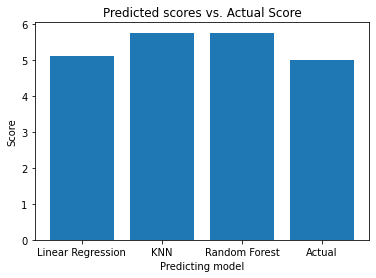

In [30]:
labels = ['Linear Regression','KNN','Random Forest','Actual']
values = [y_pred_lr_100, y_pred_knn_100, y_pred_rf_100,entry_y_100]

plt.bar(labels, values)
plt.title('Predicted scores vs. Actual Score')
plt.ylabel('Score')
plt.xlabel('Predicting model')
plt.show()

In [50]:
# np.floats need to be converted to python floats for visualization with matplotlib
errors_lr = [mae_lr, mse_lr, rmse_lr]
errors_lr = [float(x) for x in errors_lr]

errors_knn = [mae_knn, mse_knn, rmse_knn]
errors_knn = [float(x) for x in errors_knn]

errors_rf = [mae_rf, mse_rf, rmse_rf]
errors_rf = [float(x) for x in errors_rf]

cols = ['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error']

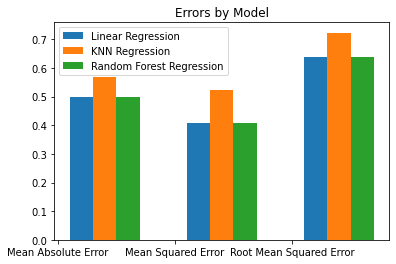

In [52]:
x_axis = np.arange(len(cols))

plt.bar(x_axis +0.20, errors_lr, width=0.2, label = 'Linear Regression')
plt.bar(x_axis +0.20*2, errors_knn, width=0.2, label = 'KNN Regression')
plt.bar(x_axis +0.20*3, errors_rf, width=0.2, label = 'Random Forest Regression')

plt.xticks(x_axis, cols)
plt.legend()
plt.title('Errors by Model')
plt.show()